<a href="https://colab.research.google.com/github/LokeshVadlamudi/MachineLearningClass/blob/master/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [59]:
df = pd.read_csv('/content/drive/My Drive/fire.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,12,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [60]:
df

,Unnamed: 0,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730.0,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63.0,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,2453137.5,133,845,1.0,Lightning,2453137.5,133.0,1530.0,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61.0,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024.0,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17.0,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400.0,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3.0,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200.0,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3.0,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58649,58649,58650,59199,FS-283735,FED,FS-FIRESTAT,FS,USTNCNF,Cherokee National Forest,804,Cherokee National Forest,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993,2449096.5,109,1000,7.0,Arson,2449096.5,109.0,1700.0,2.00,B,35.400000,-84.133333,13.0,STATE OR PRIVATE,TN,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00D\xf4\x84\x88\x88\x0...
58650,58650,58651,59200,FS-283736,FED,FS-FIRESTAT,FS,USTNCNF,Cherokee National Forest,804,Cherokee National Forest,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993,2449101.5,114,1650,7.0,Arson,2449101.5,114.0,1800.0,0.20,A,35.343333,-84.238333,5.0,USFS,TN,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00dyp\xda@\x0fU\xc0\x1...
58651,58651,58652,59201,FS-283737,FED,FS-FIRESTAT,FS,USTNCNF,Cherokee National Forest,804,Cherokee National Forest,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993,2449101.5,114,1720,7.0,Arson,2449101.5,114.0,1745.0,0.10,A,35.348333,-84.240000,5.0,USFS,TN,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\x8c\xc2\xf5(\\\x0fU...
58652,58652,58653,59202,FS-283738,FED,FS-FIRESTAT,FS,USTNCNF,Cherokee National Forest,804,Cherokee National Forest,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993,2449101.5,114,1700,7.0,Arson,2449101.5,114.0,1830.0,0.20,A,35.351667,-84.223333,5.0,USFS,TN,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x008\x1d\xe1\x17K\x0eU\...


In [61]:
df.columns

Index(['Unnamed: 0', 'OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE',
       'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [62]:
df.size

2346160

In [63]:
df.isnull().sum()

Unnamed: 0                        0
OBJECTID                          0
FOD_ID                            0
FPA_ID                            0
SOURCE_SYSTEM_TYPE                0
SOURCE_SYSTEM                     0
NWCG_REPORTING_AGENCY             0
NWCG_REPORTING_UNIT_ID            0
NWCG_REPORTING_UNIT_NAME          0
SOURCE_REPORTING_UNIT             0
SOURCE_REPORTING_UNIT_NAME        0
LOCAL_FIRE_REPORT_ID              0
LOCAL_INCIDENT_ID             17578
FIRE_CODE                     16801
FIRE_NAME                     13237
ICS_209_INCIDENT_NUMBER       56102
ICS_209_NAME                  56102
MTBS_ID                       57835
MTBS_FIRE_NAME                57835
COMPLEX_NAME                  57693
FIRE_YEAR                         0
DISCOVERY_DATE                    0
DISCOVERY_DOY                     0
DISCOVERY_TIME                    0
STAT_CAUSE_CODE                   0
STAT_CAUSE_DESCR                  0
CONT_DATE                       105
CONT_DOY                    

In [0]:
cols = ['FIRE_YEAR','FIRE_SIZE','STAT_CAUSE_DESCR','LATITUDE','LONGITUDE','STATE','DISCOVERY_DATE']

In [0]:
df = df[cols]

In [72]:
df['DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
df.head

<bound method NDFrame.head of        FIRE_YEAR  FIRE_SIZE STAT_CAUSE_DESCR  ...  STATE  DISCOVERY_DATE       DATE
0           2005       0.10    Miscellaneous  ...     CA       2453403.5 2005-02-02
1           2004       0.25        Lightning  ...     CA       2453137.5 2004-05-12
2           2004       0.10   Debris Burning  ...     CA       2453156.5 2004-05-31
3           2004       0.10        Lightning  ...     CA       2453184.5 2004-06-28
4           2004       0.10        Lightning  ...     CA       2453184.5 2004-06-28
...          ...        ...              ...  ...    ...             ...        ...
58649       1993       2.00            Arson  ...     TN       2449096.5 1993-04-19
58650       1993       0.20            Arson  ...     TN       2449101.5 1993-04-24
58651       1993       0.10            Arson  ...     TN       2449101.5 1993-04-24
58652       1993       0.20            Arson  ...     TN       2449101.5 1993-04-24
58653       1993      20.00            Arson  

In [74]:
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
df['DAY_OF_WEEK'] = df['DATE'].dt.weekday_name

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
df

,FIRE_YEAR,FIRE_SIZE,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DATE,MONTH,DAY_OF_WEEK
0,2005,0.10,Miscellaneous,40.036944,-121.005833,CA,2453403.5,2005-02-02,2,Wednesday
1,2004,0.25,Lightning,38.933056,-120.404444,CA,2453137.5,2004-05-12,5,Wednesday
2,2004,0.10,Debris Burning,38.984167,-120.735556,CA,2453156.5,2004-05-31,5,Monday
3,2004,0.10,Lightning,38.559167,-119.913333,CA,2453184.5,2004-06-28,6,Monday
4,2004,0.10,Lightning,38.559167,-119.933056,CA,2453184.5,2004-06-28,6,Monday
...,...,...,...,...,...,...,...,...,...,...
58649,1993,2.00,Arson,35.400000,-84.133333,TN,2449096.5,1993-04-19,4,Monday
58650,1993,0.20,Arson,35.343333,-84.238333,TN,2449101.5,1993-04-24,4,Saturday
58651,1993,0.10,Arson,35.348333,-84.240000,TN,2449101.5,1993-04-24,4,Saturday
58652,1993,0.20,Arson,35.351667,-84.223333,TN,2449101.5,1993-04-24,4,Saturday


la,lo,fz,fy,m

In [0]:
df_orig = df.copy()


In [0]:
df_orig = df_orig[['LATITUDE','LONGITUDE','FIRE_SIZE','FIRE_YEAR','MONTH']]

In [81]:
df_orig

,LATITUDE,LONGITUDE,FIRE_SIZE,FIRE_YEAR,MONTH
0,40.036944,-121.005833,0.10,2005,2
1,38.933056,-120.404444,0.25,2004,5
2,38.984167,-120.735556,0.10,2004,5
3,38.559167,-119.913333,0.10,2004,6
4,38.559167,-119.933056,0.10,2004,6
...,...,...,...,...,...
58649,35.400000,-84.133333,2.00,1993,4
58650,35.343333,-84.238333,0.20,1993,4
58651,35.348333,-84.240000,0.10,1993,4
58652,35.351667,-84.223333,0.20,1993,4


In [0]:
from sklearn.cluster import KMeans

In [0]:
import numpy as np

In [0]:
kmeans = KMeans(n_clusters=4,random_state=0).fit(df_orig)

In [85]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [86]:
kmeans.cluster_centers_

array([[ 3.98146672e+01, -1.10790322e+02,  6.47589145e+01,
         2.00276008e+03,  6.97673863e+00],
       [ 3.97337269e+01, -1.14420787e+02,  1.62361583e+05,
         2.00566667e+03,  7.50000000e+00],
       [ 4.16335019e+01, -1.15701336e+02,  4.52616620e+04,
         2.00562921e+03,  7.24719101e+00],
       [ 3.52166667e+01, -1.00933333e+02,  4.27696000e+05,
         2.00600000e+03,  3.00000000e+00]])

In [0]:
import matplotlib.pyplot as plt

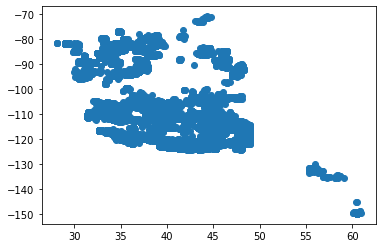

In [95]:
plt.scatter(df_orig['LATITUDE'], df_orig['LONGITUDE'])

clustering with just latitudes and longitudes

In [0]:
df_l = df.copy()

In [0]:
df_l = df_l[['LATITUDE','LONGITUDE']]

In [98]:
df_l

,LATITUDE,LONGITUDE
0,40.036944,-121.005833
1,38.933056,-120.404444
2,38.984167,-120.735556
3,38.559167,-119.913333
4,38.559167,-119.933056
...,...,...
58649,35.400000,-84.133333
58650,35.343333,-84.238333
58651,35.348333,-84.240000
58652,35.351667,-84.223333


In [0]:
kmeans_l = KMeans(n_clusters=3,random_state=0).fit(df_l)

In [105]:
kmeans_l.labels_


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [0]:
y_kmeans = kmeans_l.predict(df_l)

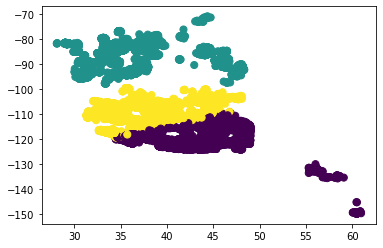

In [107]:
plt.scatter(df_l['LATITUDE'], df_l['LONGITUDE'], c=y_kmeans, s=50, cmap='viridis')


As you can conclude from the above image, the forest fires are major inbetween -100 and -125 longitudes. The biggest state inside these longitudes is california. 

clustering with fire year and fire size

In [0]:
df_y = df.copy()

In [0]:
df_y = df_y[['FIRE_YEAR','FIRE_SIZE']]

In [110]:
df_y

,FIRE_YEAR,FIRE_SIZE
0,2005,0.10
1,2004,0.25
2,2004,0.10
3,2004,0.10
4,2004,0.10
...,...,...
58649,1993,2.00
58650,1993,0.20
58651,1993,0.10
58652,1993,0.20


In [0]:
kmeans_y = KMeans(n_clusters=5,random_state=0).fit(df_y)

In [0]:
ys_kmeans = kmeans_y.predict(df_y)

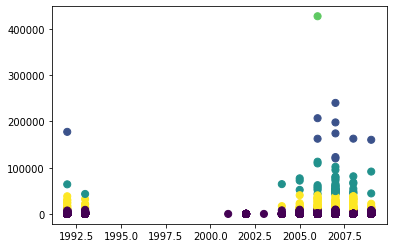

In [113]:
plt.scatter(df_y['FIRE_YEAR'], df_y['FIRE_SIZE'], c=ys_kmeans, s=50, cmap='viridis')

As you can see, majority of fires have took place after 2000's. The rise of industrial era clearly seen causing harm to forests.

****************

*******************

*****

*********

**Clustering using Tensor Flow**









